In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/ShalevQN/Ecom_15.8_ShalevCohen/refs/heads/main/Module%208%20-%20Supervised%20Learning/1_data/BostonHousing%20(1).csv"

df = pd.read_csv(url)

df.isnull().sum()
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.duplicated().sum()

0

In [7]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(kernel='rbf', C=0.1)
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae, mse, rmse

(4.926368113157244, 56.3342954519489, 7.505617592973206)

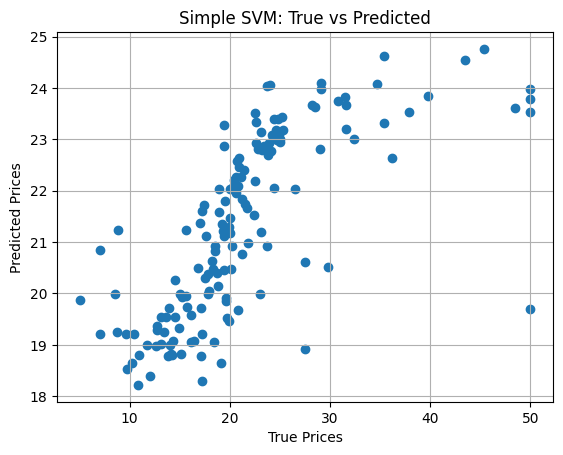

In [11]:
plt.scatter(y_test, predictions)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Simple SVM: True vs Predicted')
plt.grid(True)
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100, 1000]
}

grid = GridSearchCV(SVR(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train_scaled, y_train)
grid.best_params_

{'C': 100, 'kernel': 'rbf'}

In [14]:
best_model = grid.best_estimator_
best_preds = best_model.predict(X_test_scaled)

opt_mae = mean_absolute_error(y_test, best_preds)
opt_mse = mean_squared_error(y_test, best_preds)
opt_rmse = np.sqrt(opt_mse)
opt_mae, opt_mse, opt_rmse

(2.1604760045259486, 12.074447422070632, 3.4748305601957963)

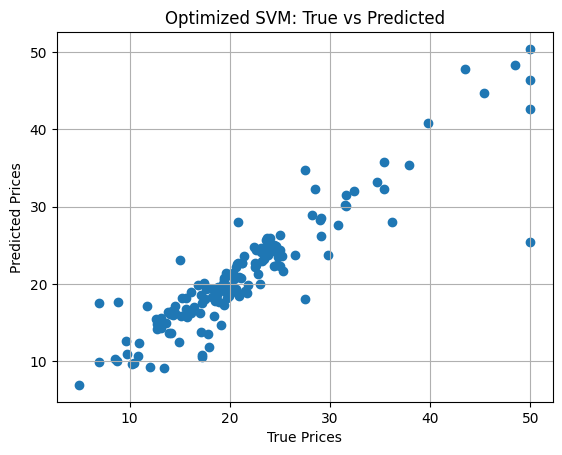

In [17]:
plt.scatter(y_test, best_preds)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Optimized SVM: True vs Predicted')
plt.grid(True)
plt.show()

In [23]:
import joblib

scaler_all = StandardScaler()
X_scaled_all = scaler_all.fit_transform(X)

final_model = SVR(kernel=grid.best_params_['kernel'], C=grid.best_params_['C'])
final_model.fit(X_scaled_all, y)

joblib.dump(final_model, 'final_svm_model.joblib')
joblib.dump(scaler_all, 'final_scaler.joblib')

['final_scaler.joblib']

In [25]:
loaded_model = joblib.load('final_svm_model.joblib')
loaded_model

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [31]:
loaded_scaler = joblib.load('final_scaler.joblib')
loaded_scaler

,copy,True
,with_mean,True
,with_std,True
